In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
import datetime
import pytz
import os
import glob
import sys
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa import stattools
from scipy.signal import savgol_filter

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

In [28]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context('notebook', font_scale=1.5,rc={"lines.linewidth": 2.5})
sns.set_palette(sns.color_palette("Paired"))

In [30]:
#Please change to the location of the git_hub reporsitory
os.chdir('/Users/nehrend/work/algo_trading_book/')

In [31]:
fx_rates = pd.read_csv('./datasets/fx_spot_history.csv',index_col='Date', parse_dates=True).pct_change(1).cumsum().dropna() +1
fx_rates.head()

,EUR,GBP,CAD,AUD,JPY
Date,,,,,
1999-01-04,0.996874,1.000060,0.994724,0.980717,0.986092
1999-01-05,1.003251,1.003505,0.985163,0.981521,0.982164
1999-01-06,1.014775,1.002780,0.984436,0.971175,0.993815
1999-01-07,1.007518,1.006417,0.985428,0.960468,0.979906
1999-01-08,1.018566,1.012086,0.984503,0.962362,0.975773


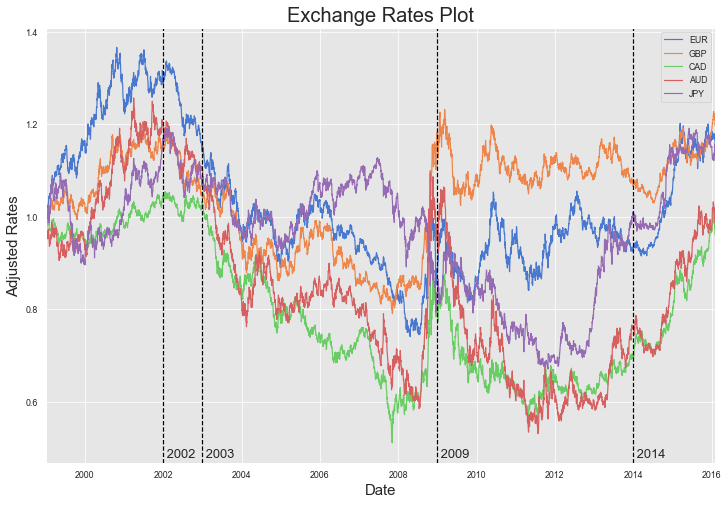

In [4]:
fig,ax = plt.subplots(figsize=(12,8))
_ = fx_rates.plot(legend=True,ax =ax)
_ = ax.set_xlabel('Date',fontsize = 15)
_ = ax.set_ylabel('Adjusted Rates',fontsize = 15)
_ = ax.axvline(x=datetime.date(2001,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2001,12,31),0.48,' 2002',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2002,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2002,12,31),0.48,' 2003',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2008,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2008,12,31),0.48,' 2009',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2013,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2013,12,31),0.48,' 2014',rotation=0,fontsize=13)
plt.savefig('./book/chapters/chapter_mvts/figures/pexchrate.eps',format='eps',dpi=100,bbox_inches='tight')
_ = ax.set_title('Exchange Rates Plot',fontsize = 20)
plt.show()

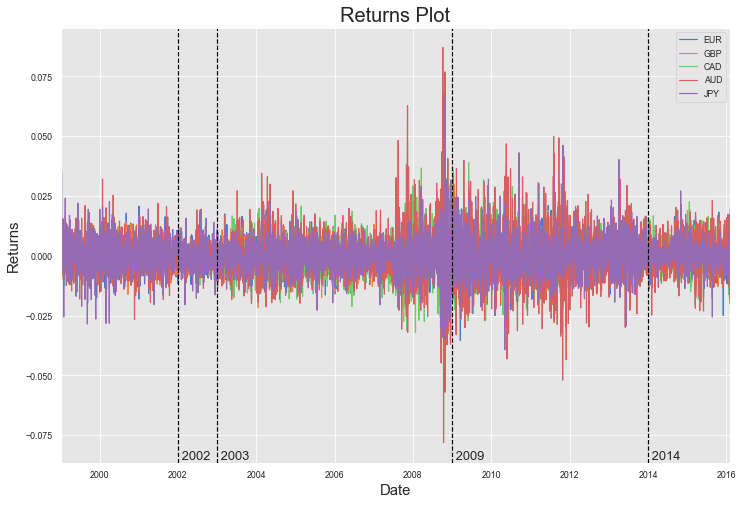

In [5]:
fig,ax = plt.subplots(figsize=(12,8))
_ = fx_rates.pct_change(1).plot(legend=True,ax =ax)
_ = ax.set_xlabel('Date',fontsize = 15)
_ = ax.set_ylabel('Returns',fontsize = 15)
_ = ax.axvline(x=datetime.date(2001,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2001,12,31),-0.085,' 2002',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2002,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2002,12,31),-0.085,' 2003',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2008,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2008,12,31),-0.085,' 2009',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2013,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2013,12,31),-0.085,' 2014',rotation=0,fontsize=13)
plt.savefig('./book/chapters/chapter_mvts/figures/preturns.eps',format='eps',dpi=100,bbox_inches='tight')
_ = ax.set_title('Returns Plot',fontsize = 20)
plt.show()

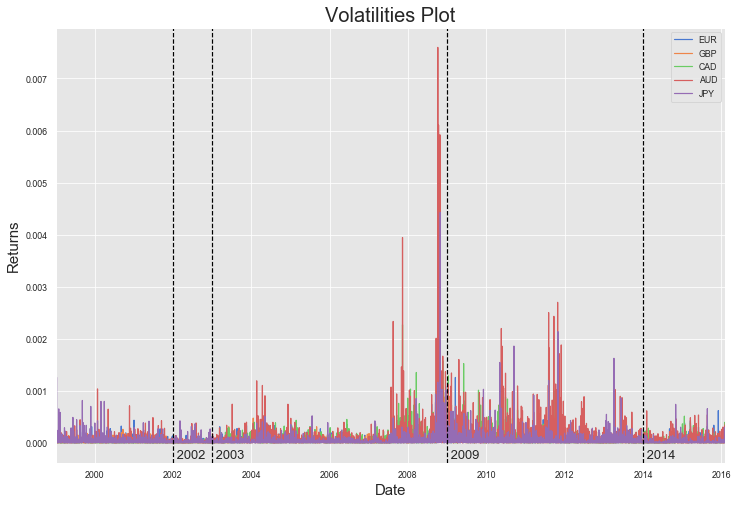

In [6]:
fig,ax = plt.subplots(figsize=(12,8))
_ = fx_rates.pct_change(1).pow(2).plot(legend=True,ax =ax)
_ = ax.set_xlabel('Date',fontsize = 15)
_ = ax.set_ylabel('Returns',fontsize = 15)
_ = ax.axvline(x=datetime.date(2001,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2001,12,31),-0.0003,' 2002',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2002,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2002,12,31),-0.0003,' 2003',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2008,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2008,12,31),-0.0003,' 2009',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2013,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2013,12,31),-0.0003,' 2014',rotation=0,fontsize=13)
plt.savefig('./book/chapters/chapter_mvts/figures/pvolat.eps',format='eps',dpi=100,bbox_inches='tight')
_ = ax.set_title('Volatilities Plot',fontsize = 20)
plt.show()

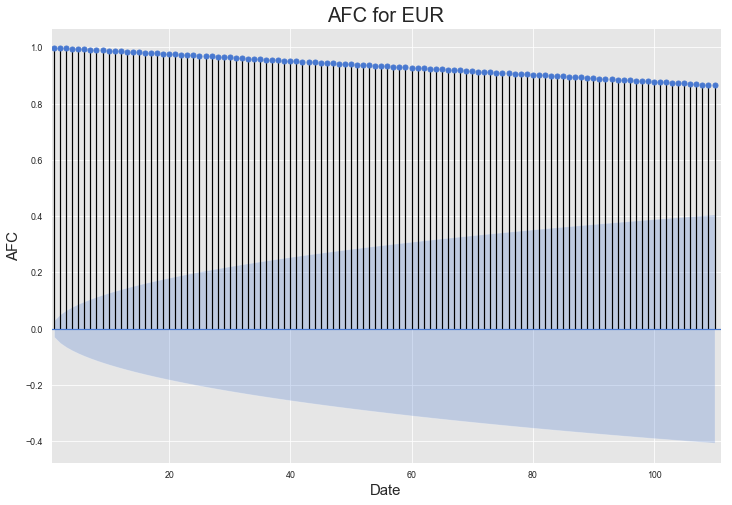

In [7]:
fig,ax = plt.subplots(figsize=(12,8))
_ = smt.graphics.plot_acf(fx_rates['EUR'], lags=110, ax=ax, alpha=0.05,title='')
_ = ax.set_xlabel('Date',fontsize = 15)
_ = ax.set_ylabel('AFC',fontsize = 15)
_ = ax.set_xlim((0.5,111))
plt.savefig('./book/chapters/chapter_mvts/figures/pautofun.eps',format='eps',dpi=100,bbox_inches='tight')
_ = ax.set_title('AFC for EUR',fontsize = 20)
plt.show()

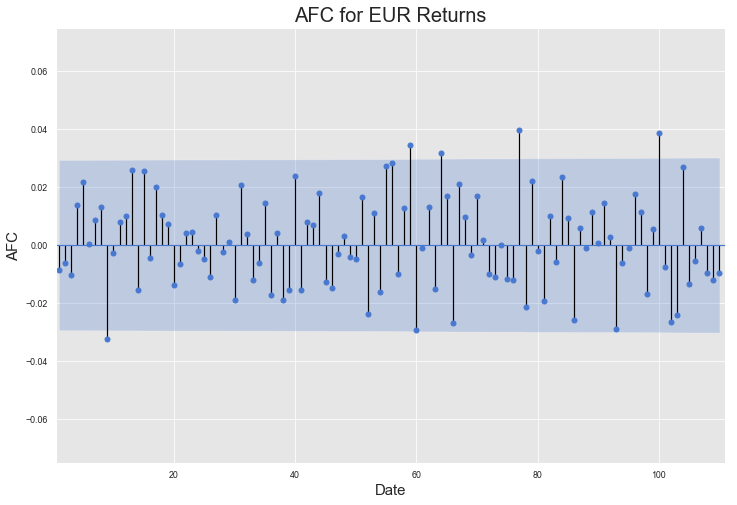

In [8]:
fig,ax = plt.subplots(figsize=(12,8))
_ = smt.graphics.plot_acf(fx_rates['EUR'].pct_change(1).dropna(), lags=110, ax=ax, alpha=0.05,title='')
_ = ax.set_xlabel('Date',fontsize = 15)
_ = ax.set_ylabel('AFC',fontsize = 15)
_ = ax.set_ylim((-0.075,0.075))
_ = ax.set_xlim((0.5,111))
plt.savefig('./book/chapters/chapter_mvts/figures/pautofun2.eps',format='eps',dpi=100,bbox_inches='tight')
_ = ax.set_title('AFC for EUR Returns',fontsize = 20)
plt.show()

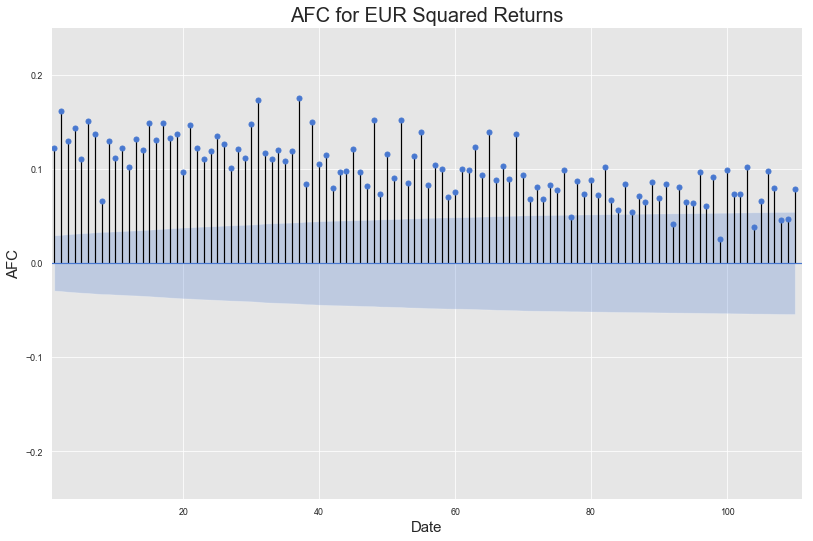

In [9]:
fig,ax = plt.subplots(figsize=(12,8))
_ = smt.graphics.plot_acf(fx_rates['EUR'].pct_change(1).pow(2).dropna(), lags=110, ax=ax, alpha=0.05,title='')
_ = ax.set_xlabel('Date',fontsize = 15)
_ = ax.set_ylabel('AFC',fontsize = 15)
_ = ax.set_ylim((-0.25,0.25))
_ = ax.set_xlim((0.5,111))
plt.tight_layout()
plt.savefig('./book/chapters/chapter_mvts/figures/pautofun3.eps',format='eps',dpi=100,bbox_inches='tight')
_ = ax.set_title('AFC for EUR Squared Returns',fontsize = 20)
plt.show()

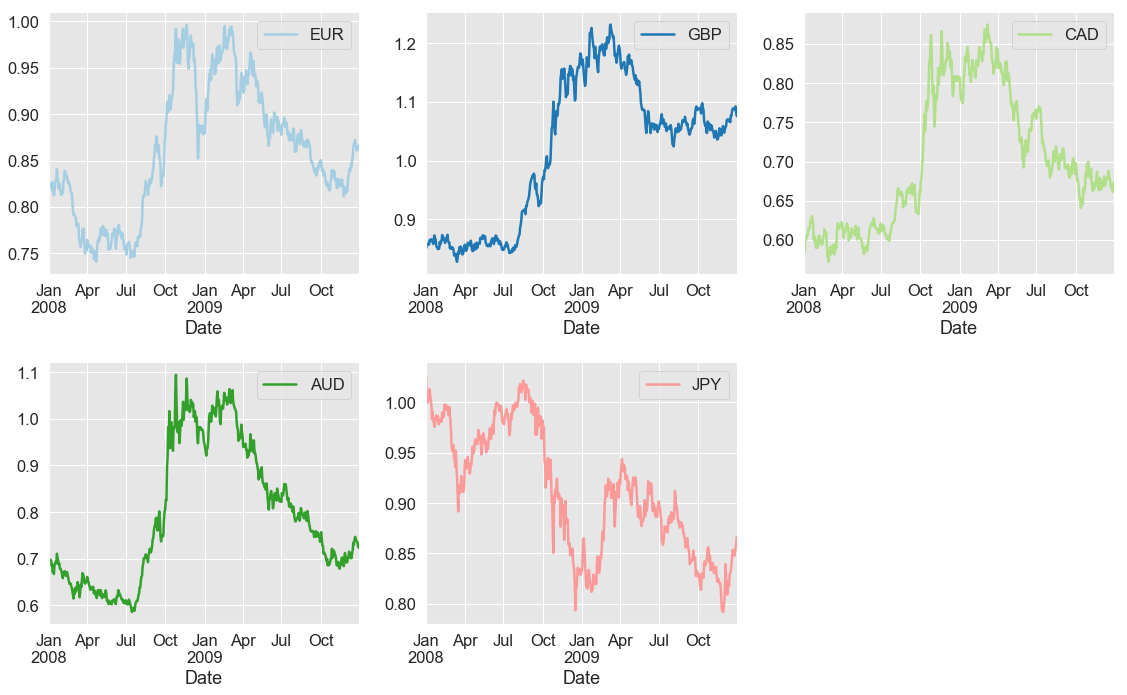

In [36]:
fig,ax = plt.subplots(2,3,figsize=(16,10),sharex=False)
_ = fx_rates.loc['2008':'2009'].plot(subplots=True,ax = ax.reshape(6,)[:5])
_ = ax[1,2].set_visible(False)
sns.despine()
plt.tight_layout()
plt.savefig('./book/chapters/chapter_mvts/figures/pcointser.png',format='png',dpi=100,bbox_inches='tight')
_ = plt.title('Cointegrated Series',fontsize = 20)
plt.show()